# Question 2

In [43]:
from __future__ import division
import numpy as np
from numpy import *
import random
from numpy import linalg as ll
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

## Question 2.4 - Implement Batch Gradient Descent

In [49]:
def read_data(path):
    
    training_data = genfromtxt( path + 'train.txt', delimiter=',')
    
    Y_train = training_data[:,0]
    X_train = training_data[:, 1:]
    Y_test = genfromtxt( path + 'test_label.txt', delimiter=',')
    X_test = genfromtxt( path + 'test.txt', delimiter=',')
    return X_train, Y_train, X_test, Y_test

In [44]:
def sigmoid_1(x, j, w, w0):
    x_j = x[j,:]
    expterm = exp(w0 + (np.matrix(w.T) * np.matrix(x_j).T)[0,0])
    result  = expterm/(1+expterm)
    return result

In [45]:
def neg_log_loss(p_y_1_ar, y, w, lamb):
    ln_sigmoid_sum = 0.0
    for i in range(len(y)):
        temp = p_y_1_ar[i] if y[i]==1 else 1-p_y_1_ar[i]
        ln_sigmoid_sum += np.log(temp)

    log_loss = 0.5*lamb*(ll.norm(w))**2-ln_sigmoid_sum/float(len(y))
    return log_loss

In [110]:
import sklearn.metrics
def predict_score(x_test, y_test,w,w0):
    n = len(x_test)
    d = len(x_test[0,:])
    prediction = np.zeros(n)
    #predict
    for j in range(n):
        prediction[j] = 1 if sigmoid_1(x_test, j, w, w0) > 0.5 else 0
                
    #compute sse
    sse = ll.norm(y_test-prediction)**2
    result1 = sklearn.metrics.precision_recall_fscore_support(y_test, prediction,average = 'binary', pos_label = 0)
    result2 = sklearn.metrics.precision_recall_fscore_support(y_test, prediction,average = 'binary', pos_label = 1)
     
    return sse, result1, result2

In [47]:
def batch_GD(x_train, y_train, eta, lamb, k):
    n = len(x_train)
    d = len(x_train[0,:])
    print "The dimension of the x_train is: ", n,d
    #initialize w and w0
    w = np.zeros(d)
    w0 = 0
    p_y_1_ar = np.zeros(n)
    loss_ar = np.zeros(k)
    iter_times = 0
    
    while iter_times < k:
        for j in range(n):
            p_y_1_ar[j] = sigmoid_1(x_train, j, w, w0)
            #sum_term += y_train[j] - p_y_1_ar[j]
        #update w0
        #w0 = w0 + eta*sum_term/float(n)
        w0 = w0 + eta*sum(y_train-p_y_1_ar)/float(n)
        for i in range(d):
            w[i] = w[i] +eta*(-lamb*w[i]+1/float(n)*(np.matrix(x_train[:,i])*np.matrix(y_train-p_y_1_ar.T).T)[0,0])
        loss_ar[iter_times] = neg_log_loss(p_y_1_ar, y_train, w, lamb)
        iter_times += 1
        print iter_times,
    return loss_ar, w, w0
    #score = predict_score(x_test, y_test,w,w0)
        

In [65]:
def batch_GD_stop(x_train, y_train, eta, lamb, epsilon):
    n = len(x_train)
    d = len(x_train[0,:])
    print "The dimension of the x_train is: ", n,d
    #initialize w and w0
    w = np.zeros(d)
    w0 = 0
    p_y_1_ar = np.zeros(n)
    loss_ar = [1000]
    diff = 1000
    iter_times = 0
    
    while diff > epsilon:
        for j in range(n):
            p_y_1_ar[j] = sigmoid_1(x_train, j, w, w0)
            #sum_term += y_train[j] - p_y_1_ar[j]
        #update w0
        #w0 = w0 + eta*sum_term/float(n)
        w0 = w0 + eta*sum(y_train-p_y_1_ar)/float(n)
        for i in range(d):
            w[i] = w[i] +eta*(-lamb*w[i]+1/float(n)*(np.matrix(x_train[:,i])*np.matrix(y_train-p_y_1_ar.T).T)[0,0])
        loss_ar.append(neg_log_loss(p_y_1_ar, y_train, w, lamb))
        diff = abs(loss_ar[iter_times]-loss_ar[iter_times+1])
        iter_times += 1
        print iter_times,
    return loss_ar, w, w0 #the first element of loss_ar is just initialized value
    #score = predict_score(x_test, y_test,w,w0)

In [50]:
def main():
    path = 'E:\\0. PhD\\Autumn 2015\\CSE546_ML\\hw\\hw2-data\\clickprediction_data\\'
    x_train, y_train, x_test, y_test = read_data(path)
    eta = 0.1
    lamb = 0.3 
    k = 1000
    loss, w, w0 = batch_GD(x_train, y_train, eta, lamb, k)
    score = predict_score(x_test, y_test,w,w0)

In [71]:
path = 'E:\\0. PhD\\Autumn 2015\\CSE546_ML\\hw\\hw2-data\\clickprediction_data\\'
x_train, y_train, x_test, y_test = read_data(path)
eta = 0.1
lamb = 0.3 
k = 1000
loss, w, w0 = batch_GD(x_train, y_train, eta, lamb, k)
score = predict_score(x_test, y_test,w,w0)

The dimension of the x_train is:  10000 54
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 2

In [73]:
print "SSE is:", score

SSE is: 54.0


In [60]:
def plotting(x_axis,y_axis):

    matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
    fig, ax = plt.subplots()
    ax.plot(x_axis, y_axis, color="green")
    
    #x_start, x_end = ax.get_xlim()
    #ax.set_xticks(np.arange(x_start, x_end, x_axis_step))

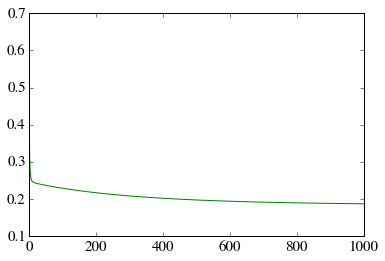

In [61]:
plotting(range(0,1000),loss)

In [66]:
path = 'E:\\0. PhD\\Autumn 2015\\CSE546_ML\\hw\\hw2-data\\clickprediction_data\\'
x_train, y_train, x_test, y_test = read_data(path)
eta = 0.1
lamb = 0.3 
epsilon = 0.0005
loss, w, w0 = batch_GD_stop(x_train, y_train, eta, lamb, epsilon)
score = predict_score(x_test, y_test,w,w0)

The dimension of the x_train is:  10000 54
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15


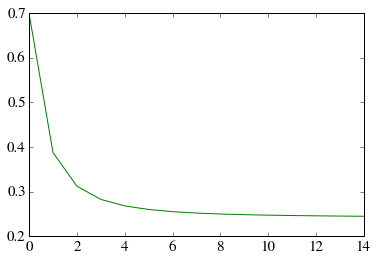

In [69]:
plotting(range(0,len(loss[1:])),loss[1:])

In [70]:
score

54.000000000000007

## Question 2.5 - Implement Stochastic Gradient Descent

In [106]:
def stoch_GD(x_train, y_train, eta, lamb, k):
    n = len(x_train)
    d = len(x_train[0,:])
    print "The dimension of the x_train is: ", n,d
    #initialize w and w0
    w = np.zeros(d)
    w0 = 0
    p_y_1_ar = np.zeros(n)
    loss_ar = np.zeros(k)
    iter_times = 0
    while iter_times < k*n:
        j = iter_times % n
        p_y_1_ar[j] = sigmoid_1(x_train, j, w, w0)
        w0 = w0 + eta*(y_train[j]-p_y_1_ar[j])

        for i in range(d):
            w[i] = w[i] +eta*(-lamb*w[i] + x_train[j,i] * (y_train[j]-p_y_1_ar[j]))
            
        if iter_times%n == (n-1) and (iter_times != 0):
            loss_ar[int(round(iter_times /n))-1] = neg_log_loss(p_y_1_ar, y_train, w, lamb)
        iter_times += 1
        #print iter_times,
    return loss_ar, w, w0

In [107]:
path = 'E:\\0. PhD\\Autumn 2015\\CSE546_ML\\hw\\hw2-data\\clickprediction_data\\'
x_train, y_train, x_test, y_test = read_data(path)
eta = 0.1
lamb = 0.3
k = 1
loss, w, w0 = stoch_GD(x_train, y_train, eta, lamb, 5)
score = predict_score(x_test, y_test,w,w0)

The dimension of the x_train is:  10000 54


In [101]:
loss

array([ 0.21524902,  0.21510627,  0.21510628,  0.21510628,  0.21510628])

In [96]:
score

54.000000000000007

In [102]:
path = 'E:\\0. PhD\\Autumn 2015\\CSE546_ML\\hw\\hw2-data\\clickprediction_data\\'
x_train, y_train, x_test, y_test = read_data(path)
eta = 0.1
lamb = 0.3 
k = 5
loss, w, w0 = batch_GD(x_train, y_train, eta, lamb, k)
score = predict_score(x_test, y_test,w,w0)

The dimension of the x_train is:  10000 54
1 2 3 4 5


In [103]:
loss

array([ 0.69934122,  0.38799052,  0.31250157,  0.28294401,  0.26841724])

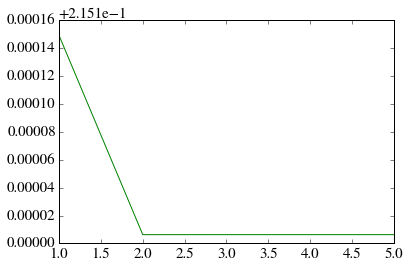

In [108]:
plotting(range(1,6),loss)

In [115]:
def read_data(path):
    
    training_data = genfromtxt( path + 'oversampled_train.txt', delimiter=',')
    
    Y_train = training_data[:,0]
    X_train = training_data[:, 1:]
    Y_test = genfromtxt( path + 'test_label.txt', delimiter=',')
    X_test = genfromtxt( path + 'test.txt', delimiter=',')
    return X_train, Y_train, X_test, Y_test

In [116]:
path = 'E:\\0. PhD\\Autumn 2015\\CSE546_ML\\hw\\hw2-data\\clickprediction_data\\'
x_train, y_train, x_test, y_test = read_data(path)
eta = 0.01
lamb = 0.3 
k = 5
loss, w, w0 = batch_GD(x_train, y_train, eta, lamb, k)
score, re1, re2 = predict_score(x_test, y_test,w,w0)

The dimension of the x_train is:  17729 54
1 2 3 4 5


In [117]:
re1

(0.94599999999999995, 1.0, 0.9722507708119219, None)

In [118]:
re2

(0.0, 0.0, 0.0, None)